# Introducción a Numpy y Matplotlib

![img/3-numpy/numpy_logo.jpg](img/3-numpy/numpy_logo.jpg)

# Que es numpy?

En la sesión anterior vimos que una de las estrucutras de datos fundamentales en python son las listas. A pesar de ser un elemento muy útil en el mundo de la programación, esta estructura de datos es ineficiente cuando queremos considerar estas listas como vectores.

Por ejemplo,

```python

lista_1 = [1, 2, 3]
lista_2 = [2, 3, 4]

suma_lista_1_2 = lista_1 + lista_2

print(suma_lista)

# output
[1, 2, 3, 2, 3, 4]
```

Si quisieramos sumar elemento a elemento, deberíamos crearnos una función con bucles que nos devolviese el vector resultante.

In [1]:
## Escribe una función que dadas dos listas nos
## devuelva la suma elemento a elemento.
## Ojo! Acuerdate de comprobar que son del mismo tamaño!

def suma_dos_listas_elemento_a_elemento(a, b):
    """
    Suma las dos listas a y b
    """
    suma = []
    if len(a) == len(b):
        for idx in range(len(a)):
            suma.append(a[idx] + b[idx])
        
    else:
        print( "el tamaño de las listas debería ser el mismo")
    return suma
            

##Extra: Echale un vistazo a la funcion zip() de python.
##Usando zip y las list comprehensions podemos reescribir
##la función en una linea de forma pythonica!


In [2]:
a = [1, 2, 3] * 100000
b = [2, 3, 4] * 100000

In [3]:
%timeit suma_a_b = suma_dos_listas_elemento_a_elemento(a, b)

56.8 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
suma_a_b = suma_dos_listas_elemento_a_elemento(a, b)

In [6]:
%timeit [x + y for x, y  in zip(a,b)]

22.4 ms ± 682 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Como veis en el ejemplo anterior, no solo es innecesariamente complicado si no que es ineficiente cuando queremos tratar con vectores de gran tamaño. Sería conveniente tener operaciones definidas para este tipo de problemas.

Eso es exactamente lo que hace **Numpy**. Interpreta las listas como vectores numéricos y nos permite realizar operaciones de algebra lineal de forma eficiente.

Por si no fuera poco, **Numpy** está escrito en **C**, uno de los lenguajes de programación más [rápidos](https://attractivechaos.github.io/plb/). Además de proporcionarnos velocidad a la hora de realizar cálculos algebráicos, sirve cómo interfaz para comunicarse con funcionalidades escritas en **C** y en **Fortran**. Ésta es la razón principal por la **Numpy** nos importa cómo analistas o cientificos de datos, aunque no trabajemos directamente en algebra: los principales módulos para el análisis de datos (pandas y sklearn) se basan en **Numpy**, por lo que entender su estructura y uso nos facilitara la comprensión de las librerias de más alto nivel.



In [7]:
## importar numpy bajo el alias np

import numpy as np

## `np.array` y `np.ndarray`

### `np.ndarray`

De la [documentación](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.html) oficial:

>  Describes an N-dimensional collection of “items” of the same type.

### `np.array`

Es un metodo de numpy que nos permite crear np.ndarray


### Crear un array a partir de listas

Para crear un array a partir de una lista, simplemente debemos pasar la lista como argumento a la función np.array()

```python

mi_lista = [1, 2, 3]

mi_array = np.array(mi_lista)

print(type(mi_array))
```

También, podemos crear un array a partir de una lista de listas.

```python

mi_lista_anidada = [[1, 2, 3],
                    [4, 5, 6]]

mi_array_2d = np.array(mi_lista_anidada)
```
                   

In [8]:
## Crea un ndarray a partir de una lista anidada
mi_lista = [1, 2, 3]

mi_lista_anidada = [[1, 2, 3],
                    [4, 5, 6]]

array_1D = np.array(mi_lista)

array_2D = np.array(mi_lista_anidada)

In [10]:
array_2D

array([[1, 2, 3],
       [4, 5, 6]])

## Atributos de np.ndarray

Cada array tiene los atributos:

* `ndim`: el número de dimensionesthe number of dimensiones
* `shape`: el tamaño de cada dimensión
* `size`: el tamaño total del array

In [14]:
## Comprueba los atributos del array creado antes

array_2D.shape

(2, 3)

## Arrays de números aleatorios

Numpy tiene una funcionalidad muy útil para generar datos de forma aleatoria o siguiendo alguna distribución estadística.

```python
gauss_dist = np.random.normal(loc=0,
                              scale=1,
                              size=(1000, 2))
```

In [30]:
## inicializar un vector aleatorio de enteros
np.random.seed(42)  # semilla for reproducibility

x1 = np.random.randint(10, size=(6,))# One-dimensional array
x2 = np.random.randint(10, size=(2, 4))# Two-dimensional array

In [31]:
x1

array([6, 3, 7, 4, 6, 9])

In [32]:
x2

array([[2, 6, 7, 4],
       [3, 7, 7, 2]])

In [ ]:
## crea un array de 200 filas y 3 columnas aleatorio que siga una distribución
## de poisson

x_pois = np.random.###(lam=2., size=(###, ###))

In [ ]:
x_pois

## Indexing
Sigue un patron similar a las listas de python.

Para acceder al $i^{th}$ elemento de una array 1-dimensional se sigue la sintaxis de braquets.

Para acceder al $i^{th}$ elemento de una array 2-dimensional se sigue la sintaxis de braquets con los indices separados por comas.

In [36]:
## accede al primer, tercer y quinto elemento de x1.
print(x1[0])
print(x1[2])
print(x1[4])

6
7
6


In [37]:
## accede primer al elemento de la primera fila y segunda columna de x2
x2[0,1]

6

## Slicing

De la misma forma que hacemos "slices" de listas en python podemos crearlos en los np.array.

Además, podemos especificar un "step", que es la cantidad de elementos que se saltara entre uno y otro.


x[start:stop:step]

Si no se especifica alguno de ellos, numpy toma el valor por defecto, que son:

* start=0
* stop=tamaño de la dimensión
* step=1

In [38]:
## Crea un array de una dimension con los numeros del 0 al 9 usando arange
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
## Crea un slice que contenga los 3 primeros elementos
a_3 = a[:3]
a_3

array([0, 1, 2])

In [40]:
## Crea un slice que contenga los 2 ultimos elementos
a_last_2 = a[-2:]
a_last_2

array([8, 9])

In [41]:
## Crea un slice que contenga los 6 primeros elementos uno si y uno no
a[:6:2]

array([0, 2, 4])

#### Ojo! si el paso es negativo los campos de start y stop se invierten. Es una forma muy conveniente de invertir el orden de un array

In [43]:
ordered = np.arange(10)
print(ordered)

[0 1 2 3 4 5 6 7 8 9]


In [44]:
reverse_order = ordered[::-1] 
print(reverse_order)

[9 8 7 6 5 4 3 2 1 0]


## Multidimensiones

Hay que especificar el sub-slice en cada una de las dimensiones separados por coma en braquets


```python

x = np.array([[3, 5, 2, 4],
              [7, 6, 8, 8],
              [1, 6, 7, 7]])
# columnas
x[:, 2]
# output
array([2, 8, 7])

# filas
x[1, :]

# output
array([7, 6, 8, 8])
```

In [47]:
## accede a la primera columna
x = np.array([[3, 5, 2, 4],
              [7, 6, 8, 8],
              [1, 6, 7, 7]])

x[0, :]

array([3, 5, 2, 4])

In [ ]:
## accede a la segunda columna
x[:, #]

In [ ]:
## elimina la primera fila
x[#:, :]

## Expresiones matemáticas y funciones útiles

Numpy permite evaluar expresiones matematicas y funciones de forma sencilla y eficiente.

Por ejemplo:

```python

x = np.random.randint(10, size=20)

add_5_element_wise = x + 5
```

Suma `5` a cada elemento del array. Esto funciona de forma similar para las funciones aritméticas básicas (+, -, \*,...)

In [ ]:
# crea un array aleatorio que elija entre tres números y multiplica cada uno de sus elementos por 3
a =np.random.choice??

In [48]:
a = np.random.choice(np.array([1, 2, 3]), size=(100,))

In [50]:
a * 3

array([6, 3, 6, 6, 6, 6, 3, 3, 6, 6, 3, 3, 3, 9, 9, 9, 6, 9, 6, 6, 9, 6,
       9, 9, 3, 9, 3, 9, 9, 3, 3, 9, 6, 3, 6, 6, 6, 3, 6, 3, 6, 9, 9, 3,
       9, 9, 6, 3, 6, 6, 6, 6, 6, 6, 6, 3, 9, 6, 6, 6, 6, 6, 6, 9, 9, 6,
       9, 3, 6, 3, 3, 6, 9, 3, 6, 3, 3, 3, 3, 9, 3, 3, 3, 9, 3, 3, 9, 9,
       9, 3, 9, 9, 3, 9, 3, 6, 9, 6, 3, 9])

<font color="blue"> que pasa si multiplicamos una lista por un entero ?

### Funciones trigonométricas

In [53]:
# Crea un vector de 5 elementos espaciados de forma homogenea
# entre 0 y pi, ambos incluidos
x = np.linspace(0, 4*np.pi, 5)
x

array([ 0.        ,  3.14159265,  6.28318531,  9.42477796, 12.56637061])

In [55]:
print(x)
sin_x = np.sin(x)
print(sin_x)

[ 0.          3.14159265  6.28318531  9.42477796 12.56637061]
[ 0.0000000e+00  1.2246468e-16 -2.4492936e-16  3.6739404e-16
 -4.8985872e-16]


In [ ]:
# demuestra el teorema fundamental de la trigonometria

sin_x = ##

cos_x = ##

trigo_101 = ##

## Exponentes y logaritmos

In [ ]:
import numpy as np

In [56]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [57]:
np.power(x, 3)

array([ 1,  8, 27])

In [58]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


Unas transformaciones muy útiles cuando lidiamos con valores pequeños son:

In [59]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


# Funciones estadísticas integradas

Numpy permite calcular de forma rápida parametros estadisticos y otras aggregaciones sobre un array

In [66]:
# suma de todos los elementos
x = np.arange(10)

In [67]:
x.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [61]:
# media y desviación estandar

print('mean:', x.mean())
print('std:', x.std())

mean: 4.5
std: 2.8722813232690143


In [ ]:
# percentiles
np.percentile(x, 50)

In [ ]:
# la suma acumulada de los valores
print(x)
print(x.cumsum())

### Ejercicios

Utiliza el cheatsheet disponible o busca las funcionalidades pertinentes

1. Crea una matriz identidad de $4 \times 4$
2. Genera el array siguiente sin crear la lista
```
1 2 3
4 5 6
7 8 9
```
3. Genera una matrix aleatoria de $4 \times 4 \times 4$ con números distribuidos siguiendo una gaussiana
4. Genear `n` intervalos entre 0 and 1 distribuidos de forma logarítmica

# Matplotlib

![img/3-numpy/matplotlib-logo.png](img/3-numpy/matplotlib-logo.png)

*Matplotlib* permite graficar cosas. ```pyplot``` es una capa que dota a la librería de una sintaxis similar a la de MATLAB.

Se complementa a la perfección con [seaborn](http://seaborn.pydata.org/), que nos permitirá hacer además gráficos estadísticos.

En conjunto, son un duo muy potente que permite hacer cosas como ésta [código fuente](http://seaborn.pydata.org/examples/structured_heatmap.html):

<img src='img/3-numpy/structured_heatmap.png' width=500>

A medida que vayamos avanzando entraremos en más detalle sobre los diferentes tipos de gráficos. Por ahora, nos limitaremos a hablar sobre los básicos:

- Lineas
- Barras e Histogramas
- Scatter plots

In [68]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

# Line plot example

Matplotlib puede crear graficos X-Y basicos a partir de arrays o listas del mismo tamaño. Si solo le diesemos una lista o array, la graficaría contra su indice.

Cada vez que llamamos a plt.plot() nos sobrepone una nueva curva en la misma figura. Si quisieramos una nueva, deberíamos especificar 'plt.figure()' para crear una nueva.

In [72]:
bms

array([[ 0.74930242,  0.03201447,  1.68900294,  0.14858427, -1.23700082,
         0.20731076, -2.40253103, -2.02396216, -2.13128816, -2.86724008,
        -3.06717993, -3.91470342, -2.37244747, -0.56795038, -1.25368797,
        -0.97816309, -2.30323956, -1.23018741, -0.18317823, -0.47844046,
        -0.46155541, -0.55532085, -2.17377869, -0.62777454, -1.39472778,
        -2.15487705, -2.30529691, -1.30974832, -1.90105154, -3.85323676,
        -4.74023482, -4.3160944 , -2.12634411, -3.38626408, -4.68276585,
        -6.19536135, -7.83208634, -6.62639488, -5.1317063 , -4.95395041,
        -5.42166318, -3.63051939, -3.45661135, -2.36717464, -2.88362358,
        -2.83937973, -4.07672138, -3.4474724 , -3.25653465, -4.15109789,
        -5.03220503, -3.41624653, -1.44457778, -1.65771312, -1.58995955,
        -1.18984507, -1.04181331, -2.71611103, -2.28824036, -4.37612939,
        -5.10881358, -4.60338643, -4.00339223, -4.81346531, -5.27190225,
        -5.86573876, -5.96858292, -5.99537727, -5.3

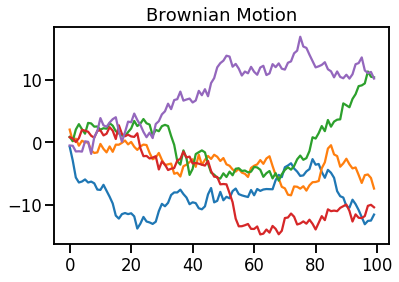

In [73]:
xs = np.random.randn(5, 100)

plt.title("Brownian Motion")
bms = xs.cumsum(axis=1) ## suma acumulada para definir el movimiento en el eje y
for bm in bms:
    plt.plot(bm)

### Subplots

Muchas veces querremos tener los gráficos por separado. La forma más sencilla de generarlos es usando el comando sublplots y especificando el numero de filas y/o columnas en los que queremos que se dividan.

```python

fig, ax = plt.subplots(nrows=2,
                       ncols=3,
                       sharex=True,
                       sharey=True)
```
`ax` es un np.array de (nrows, ncols) al que podremos acceder por los indices para poder "colocar" los plots que queramos.
                       
                    

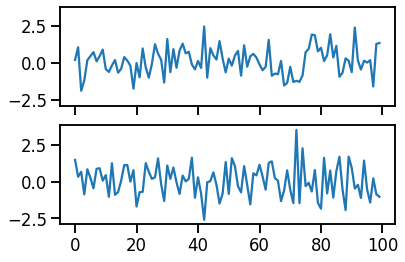

In [74]:
fig, ax = plt.subplots(nrows=2,
                       sharex=True,
                       sharey=True)
for i in range(2):
    ax[i].plot(np.random.randn(100))

## Histogram and bar plot

Aunque *matplotlib* tiene funcionalidad para histogramas, los de seaborn ofrecen una funcionaliad más completa.

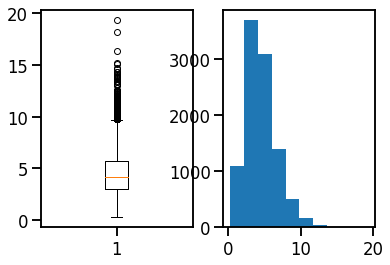

In [76]:
# matplotlib

data = np.random.gamma(4.5, 1.0, 10000)

fig, ax = plt.subplots(ncols=2)

ax[0].boxplot(data) 
ax[1].hist(data)

plt.show()

**Seaborn: It provides a high-level interface for drawing attractive and informative statistical graphics.**

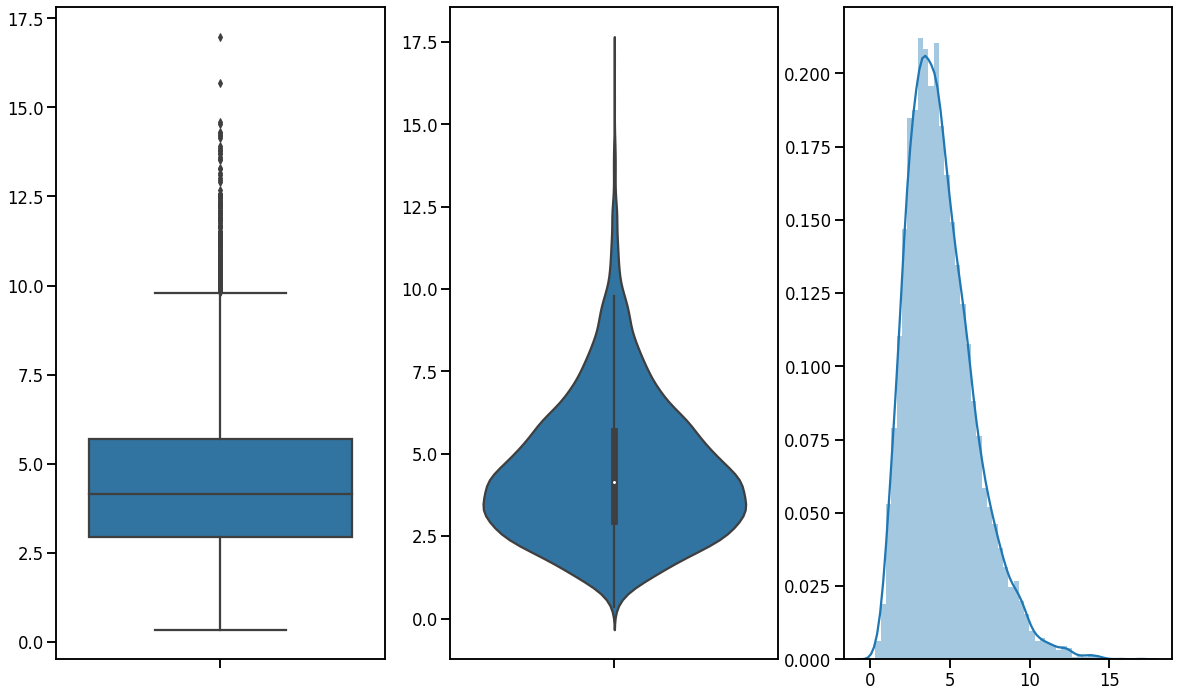

In [77]:
# seaborn
# matplotlib
data = np.random.gamma(4.5, 1.0, 10000)

fig, ax = plt.subplots(ncols=3, figsize=(20, 12))

sns.boxplot(data, ax=ax[0], orient='v')

sns.violinplot(data, ax=ax[1], orient='v')

sns.distplot(data, ax=ax[2])

plt.show()

## Scatter plots
Necesitamos dos arrays o listas del mismo tamaño para poder plotear una contra la otra

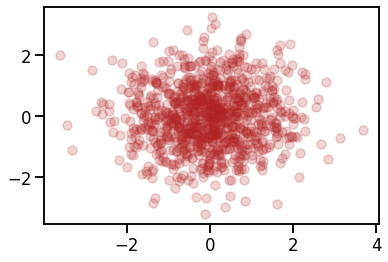

In [78]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

plt.scatter(x, y, c='firebrick', alpha=0.2)
plt.show()

## Seaborn

In [ ]:
sns.jointplot(x=x, y=y, kind='kde')

In [ ]:
## Genera un sinusoide con 1000 elementos

x = ## 
y_real = np.sin(x)

In [ ]:
plt.scatter(x, y_real)

In [ ]:
noise = np.random.normal(0, 0.1, size=###)

In [ ]:
y_noise = y_real + noise

In [ ]:
plt.scatter(x, y_noise)